# Lecture 4: Data Visualisation

* Pandas + matplotlib
    * Pie chart
    * Line chart
    * Scatter plot
    * Histogram

## Setup

Pandas:

In [1]:
import pandas as pd

Matplotlib + Seaborn:

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns; sns.set()

## Data

From [OECD](https://data.oecd.org/gdp/gross-domestic-product-gdp.htm).

In [3]:
gdp = pd.read_csv('OECD GDP 2021-04.csv')
gdp

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag Codes
0,AUS,GDP,TOT,MLN_USD,A,1960,25034.740000,NaN
1,AUS,GDP,TOT,MLN_USD,A,1961,25326.382000,NaN
2,AUS,GDP,TOT,MLN_USD,A,1962,27913.206000,NaN
3,AUS,GDP,TOT,MLN_USD,A,1963,30385.723000,NaN
4,AUS,GDP,TOT,MLN_USD,A,1964,32694.467000,NaN
...,...,...,...,...,...,...,...,...
4832,EU27_2020,GDP,TOT,USD_CAP,A,2016,39172.901704,NaN
4833,EU27_2020,GDP,TOT,USD_CAP,A,2017,40728.649363,NaN
4834,EU27_2020,GDP,TOT,USD_CAP,A,2018,42055.470257,NaN
4835,EU27_2020,GDP,TOT,USD_CAP,A,2019,43354.982276,NaN


We can use `info()` to get an overview of all variables in a `DataFrame`:

In [4]:
gdp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4837 entries, 0 to 4836
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   LOCATION    4837 non-null   object 
 1   INDICATOR   4837 non-null   object 
 2   SUBJECT     4837 non-null   object 
 3   MEASURE     4837 non-null   object 
 4   FREQUENCY   4837 non-null   object 
 5   TIME        4837 non-null   int64  
 6   Value       4837 non-null   float64
 7   Flag Codes  1265 non-null   object 
dtypes: float64(1), int64(1), object(6)
memory usage: 302.4+ KB


... and we can use `describe()` to get summary statistics of all numerical variables:

In [5]:
gdp.describe()

,TIME,Value
count,4837.000000,4.837000e+03
mean,1997.892289,1.003483e+06
std,14.610711,4.081933e+06
min,1960.000000,1.029476e+02
25%,1987.000000,1.659526e+04
50%,2000.000000,4.077592e+04
75%,2010.000000,2.786919e+05
max,2020.000000,6.308436e+07


Some explanation of the variables:
* `MEASURE`:
    * `MLN_USD`: million USD
    * `USD_CAP`: per capita

Remove non-country data (e.g., `OECD`):

In [6]:
gdp = gdp[gdp['LOCATION'].str.len() == 3]

## Pie Chart

Top-10 countries by GDP (in million USD) in 2019.

In [7]:
gdp_top10 = gdp[(gdp['MEASURE'] == 'MLN_USD')
                & (gdp['TIME'] == 2019)].sort_values('Value', ascending=False).head(10)

In [8]:
gdp_top10

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag Codes
3096,CHN,GDP,TOT,MLN_USD,A,2019,2.352336e+07,NaN
2928,USA,GDP,TOT,MLN_USD,A,2019,2.143323e+07,NaN
1460,JPN,GDP,TOT,MLN_USD,A,2019,5.346540e+06,E
880,DEU,GDP,TOT,MLN_USD,A,2019,4.644164e+06,NaN
3487,RUS,GDP,TOT,MLN_USD,A,2019,4.315441e+06,NaN
3368,IDN,GDP,TOT,MLN_USD,A,2019,3.338144e+06,NaN
768,FRA,GDP,TOT,MLN_USD,A,2019,3.320560e+06,P
2816,GBR,GDP,TOT,MLN_USD,A,2019,3.242466e+06,NaN
1358,ITA,GDP,TOT,MLN_USD,A,2019,2.678904e+06,NaN
1762,MEX,GDP,TOT,MLN_USD,A,2019,2.608650e+06,P


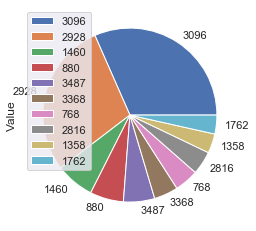

In [9]:
gdp_top10.plot.pie(y='Value');

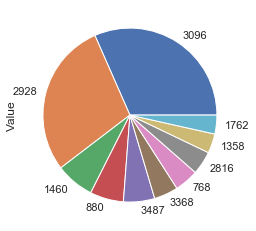

In [10]:
gdp_top10.plot.pie(y='Value', legend=False);

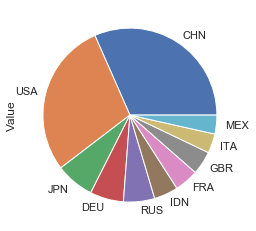

In [11]:
gdp_top10.plot.pie(y='Value', legend=False,
                   labels=gdp_top10['LOCATION']);

Display shares using Python's old string formatting syntax (with `%`):

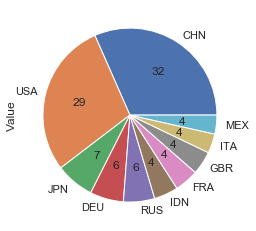

In [12]:
gdp_top10.plot.pie(y='Value', legend=False,
                   labels=gdp_top10['LOCATION'],
                   autopct='%.0f');

Documentation is in [pandas.DataFrame.plot.pie](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.pie.html) and [matplotlib.pyplot.pie](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.pie.html).

## Line Plot

GDP per capita in the Netherlands since the 60s.

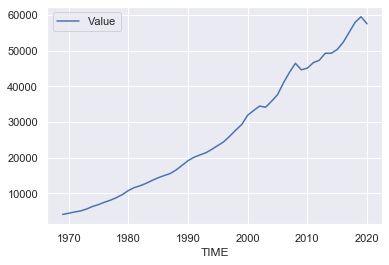

In [13]:
gdp[(gdp['LOCATION'] == 'NLD')
    & (gdp['MEASURE'] == 'USD_CAP')].plot(x='TIME', y='Value');

Documentation is in [pandas.DataFrame.plot](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html) and [matplotlib.pyplot](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.html).

## Scatter Plot

GDP per capita in the Netherlands since the 60s.

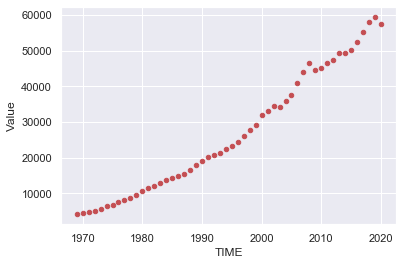

In [14]:
gdp[(gdp['LOCATION'] == 'NLD')
    & (gdp['MEASURE'] == 'USD_CAP')].plot.scatter(x='TIME',
                                                  y='Value',
                                                  c='r');

Documentation is in [pandas.DataFrame.plot.scatter](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.scatter.html) and [matplotlib.pyplot.scatter](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html).

## Histogram

Distribution of GDP in 2019.

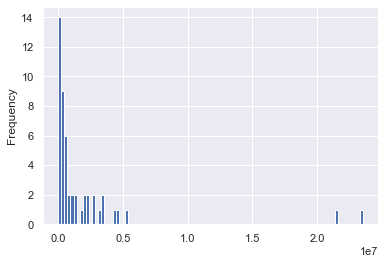

In [15]:
gdp.loc[(gdp['MEASURE'] == 'MLN_USD')
        & (gdp['TIME'] == 2019), 'Value'].plot.hist(bins=100);

Documentation is in [pandas.DataFrame.plot.hist](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.hist.html) and [matplotlib.pyplot.hist](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html).

© 2023 Philipp Cornelius